<a href="https://colab.research.google.com/github/Bird120/DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38359426.75it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1931280.29it/s]

Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12794246.19it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 693806.13it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [8]:
 conv1 = nn.Conv2d(1, 6, 3, 1)
 conv2 = nn.Conv2d(6, 16, 3, 1)

In [9]:
for i, (X_Train,y_train) in enumerate(train_data):
  break

In [10]:
X_Train.shape

torch.Size([1, 28, 28])

In [11]:
x = X_Train.view(1, 1, 28, 28)

In [12]:
x = F.relu(conv1(x))

In [13]:
x.shape

torch.Size([1, 6, 26, 26])

In [14]:
x = F.max_pool2d(x, 2, 2)

In [15]:
x.shape

torch.Size([1, 6, 13, 13])

In [16]:
x = F.relu(conv2(x))

In [17]:
x.shape

torch.Size([1, 16, 11, 11])

In [18]:
#Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    #Fully connection layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) # 2X2 kernal & stride of 2

    #Second
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    #Re view to flatten
    X = X.view(-1, 16*5*5)

    # fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)





In [19]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
#Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
import time

start_time = time.time()

#Create Variable to tracks things

epochs = 5
train_losses = []
test_losses = []

train_correct = []
test_correct = []

#For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b,(X_Train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_Train) # get predicted values from  the training set. Not flatted already 2d (x data and y label)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]  #add up the number of corect predictions"
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Udpate our parameter
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print out some results
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  #Test
  with torch.no_grad(): #no gradient so we don't update our weights and biases with test
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')



Epoch: 0 Batch: 600  Loss: 0.1623610556125641
Epoch: 0 Batch: 1200  Loss: 0.1502392590045929
Epoch: 0 Batch: 1800  Loss: 0.4744560718536377
Epoch: 0 Batch: 2400  Loss: 0.14238706231117249
Epoch: 0 Batch: 3000  Loss: 0.007758188061416149
Epoch: 0 Batch: 3600  Loss: 0.3836284875869751
Epoch: 0 Batch: 4200  Loss: 0.0038223876617848873
Epoch: 0 Batch: 4800  Loss: 0.0021286322735249996
Epoch: 0 Batch: 5400  Loss: 0.0569545142352581
Epoch: 0 Batch: 6000  Loss: 0.00038789428072050214
Epoch: 1 Batch: 600  Loss: 0.005851339548826218
Epoch: 1 Batch: 1200  Loss: 0.3855525553226471
Epoch: 1 Batch: 1800  Loss: 0.004819948226213455
Epoch: 1 Batch: 2400  Loss: 0.003216963727027178
Epoch: 1 Batch: 3000  Loss: 0.0332382395863533
Epoch: 1 Batch: 3600  Loss: 0.5372857451438904
Epoch: 1 Batch: 4200  Loss: 0.04561494290828705
Epoch: 1 Batch: 4800  Loss: 0.0007510822033509612
Epoch: 1 Batch: 5400  Loss: 0.0001173773780465126
Epoch: 1 Batch: 6000  Loss: 0.14201366901397705
Epoch: 2 Batch: 600  Loss: 0.023733

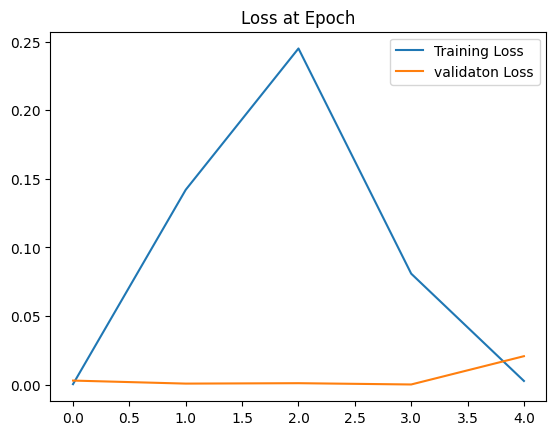

In [22]:
#graph loss epochs
train_losses = [tl.item() for tl in train_losses]
#for tl in train_losses:
#    print(type(tl))

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="validaton Loss" )
plt.title("Loss at Epoch")
plt.legend()

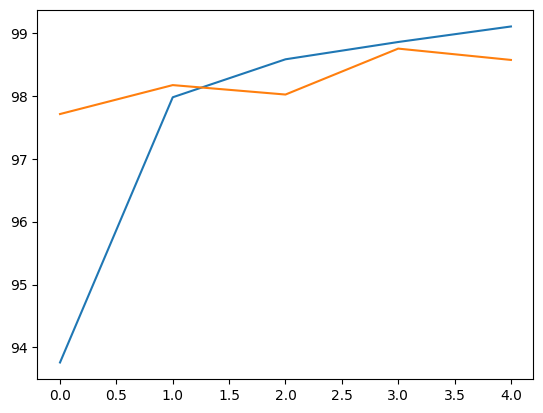

In [23]:
plt.plot([t/600 for t in train_correct],label="Training Accurancy")
plt.plot([t/100 for t in test_correct],label="validation accurancy")

In [24]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [25]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [26]:
correct.item() / len(test_data) * 100

98.57000000000001